In [ ]:
import pandas as pd
import regex as re
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import defaultdict
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# import nltk

# nltk.download('punkt')
# nltk.download('stopwords')

<h1>Read Datasets</h1>

In [ ]:
df = pd.read_csv('IMDB Dataset.csv')
df = df[:8000]

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     8000 non-null   object
 1   sentiment  8000 non-null   object
dtypes: object(2)
memory usage: 125.1+ KB


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
sentiments_counts = df['sentiment'].value_counts()
sentiments_counts

positive    4003
negative    3997
Name: sentiment, dtype: int64

<h1>Data Preprocessing</h1>

<h2>Case Folding</h2>

In [ ]:
def case_folding(text):
    text = text.lower()

    return text

In [ ]:
df['review'] = df['review'].apply(case_folding)

In [ ]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


<h2>Remove HTML Encoding & Punctuations</h2>

In [ ]:
df['html_tag'] = df['review'].apply(lambda x: re.findall(r'\W', x))
df['html_tag'] = df['html_tag'].apply(''.join)

df['html_tag'].head()

0                  '  .   ,        .< />< />       ...
1       . < />< />     -  --     ,   ,       . < />...
2                   ,          - .    ,           (...
3     '       ()  '      &       .< />< />       .....
4     ' "     "       . .         .            ,   ...
Name: html_tag, dtype: object

In [ ]:
def remove_punctuations_and_html_encoding(text):
    patterns = '[^\w\s]'
    patterns2 = 'br'

    text = re.sub(patterns, '', text)
    text = re.sub(patterns2, '', text)

    return text

In [ ]:
df['review'] = df['review'].apply(remove_punctuations_and_html_encoding)

In [ ]:
df['html_tag_after'] = df['review'].apply(lambda x: re.findall(r'\W', x))

In [ ]:
df.head()

,review,sentiment,html_tag,html_tag_after
0,one of the other reviewers has mentioned that ...,positive,"' . , .< />< /> ...","[ , , , , , , , , , , , , , , , ..."
1,a wonderful little production the filming te...,positive,". < />< /> - -- , , . < />...","[ , , , , , , , , , , , , , , , ..."
2,i thought this was a wonderful way to spend ti...,positive,", - . , (...","[ , , , , , , , , , , , , , , , ..."
3,basically theres a family where a little boy j...,negative,' () ' & .< />< /> .....,"[ , , , , , , , , , , , , , , , ..."
4,petter matteis love in the time of money is a ...,positive,"' "" "" . . . , ...","[ , , , , , , , , , , , , , , , ..."


<h2>Stopwords Removal</h2>

In [ ]:
from nltk.corpus import stopwords
import nltk

In [ ]:
def stopword_removal(text):
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if word.casefold() not in stop_words]

    return ' '.join(filtered_words)

In [ ]:
# df['review'] = df['review'].apply(stopword_removal)

# df.head()

In [ ]:
df = df.drop(columns=['html_tag', 'html_tag_after'])

df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming te...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


In [ ]:
df['sentiment'] = df['sentiment'].replace({'positive': 1, 'negative': 0})

df

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production the filming te...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically theres a family where a little boy j...,0
4,petter matteis love in the time of money is a ...,1
...,...,...
7995,wow its been years since i last saw this movie...,1
7996,this film is an impressionistic poetic take on...,1
7997,i never realized what a fabulous dancer lana t...,1
7998,there was nothing of value in the original mov...,0


<h2>Train Test Split</h2>

In [ ]:
X = df['review'].values
y = df['sentiment'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
print(f'Length Train Set: {len(X_train)}\n')
print(f'Length Test Set: {len(X_test)}\n')

Length Train Set: 7200

Length Test Set: 800



In [ ]:
# Jumlah sample pada tiap class data latih
value_train, counts_train = np.unique(y_train, return_counts=True)

for value, count in zip(value_train, counts_train):
  print(f'{value}: {count}')

0: 3605
1: 3595


In [ ]:
# Jumlah sample pada tiap class data uji
value_test, counts_test = np.unique(y_test, return_counts=True)

for value, count in zip(value_test, counts_test):
  print(f'{value}: {count}')

0: 392
1: 408


In [ ]:
X_train[0]

'i have to agree with some of the other comments and even go a step further   nothing about this film worked absolutely nothing delmar our central character makes the decision to become a surrogate mother in order to earn enough money to buy a restaurant but along the way fall for a wise exjailbird at the same time her friend hortense is trying to get her lawyer boyfriend to finally marry her she also happens to be sleeping with marlon who is desperately in love with her then theres delmars other jethro who gets involved with a former coke addict missy who reveals she was sexually abused by her adopted father on the sidelines we also have the eccentricmother who has an assortment of equally odd friends one of whom dies on the couch at the beginning of the film so far so good but after introducing these characters and story lines addressing life death grief and love in the first half the film simply loses direction   if the writer had only selected one or two characters and allowed us t

<h1>Naive Bayes Algorithm</h1>

<h2>Term Frequency</h2>

In [ ]:
word2id = {}
counter = 0

for sentence in X_train:
    tokens = sentence.split()
    for token in tokens:
        if token not in word2id:
            word2id[token] = counter
            counter += 1

In [ ]:
len(word2id)

58269

In [ ]:
X_vec_matrix = np.zeros((len(X_train), len(word2id)))

In [ ]:
for index_sen, sentences in enumerate(X_train):
    for term, index_term in word2id.items():
        if term in sentences:
            X_vec_matrix[index_sen][index_term] += 1

In [ ]:
X_vec_matrix = X_vec_matrix.astype(int)

In [ ]:
X_vec_matrix

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1]])

<h2>SMOTE</h2>

In [ ]:
smote = SMOTE()

X_oversampled, y_oversampled = smote.fit_resample(X_vec_matrix, y_train)

<h3>Result</h3>

In [ ]:
unique, counts = np.unique(y_oversampled, return_counts=True)

n_X_oversampled = counts[0]
n_y_oversampled = counts[1]

print(f'{n_X_oversampled}\n')
print(n_X_oversampled)

3605

3605


In [ ]:
unique_b, counts_b = np.unique(y_train, return_counts=True)

n_X = counts_b[0]
n_y = counts_b[1]

print(f'{n_X}\n')
print(n_y)

3605

3595


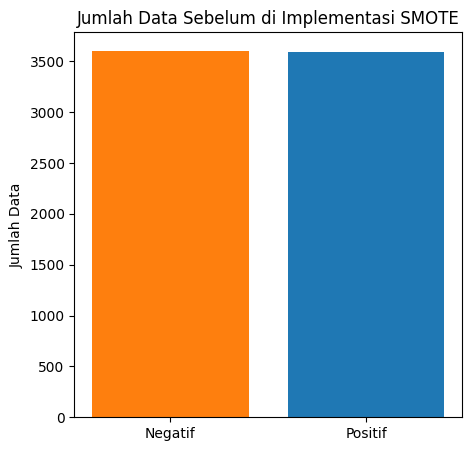

In [ ]:
label = ['Negatif', 'Positif']
data = [n_X, n_y]

plt.figure(figsize=(5,5))
plt.title('Jumlah Data Sebelum di Implementasi SMOTE')
plt.bar(label, data, color=['#FE7F0E','#1F78B4'])
plt.ylabel('Jumlah Data')

plt.show()

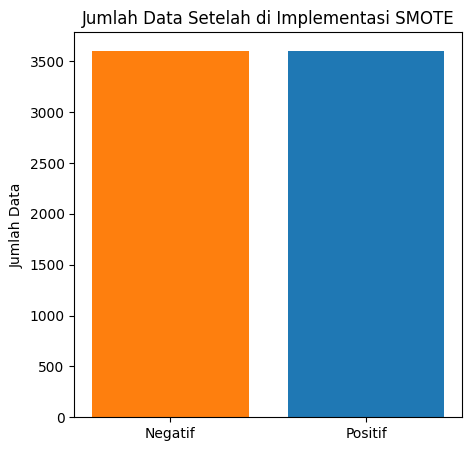

In [ ]:
label_oversampled = ['Negatif', 'Positif']
data_oversampled = [n_X_oversampled, n_y_oversampled]

plt.figure(figsize=(5,5))
plt.title('Jumlah Data Setelah di Implementasi SMOTE')
plt.bar(label_oversampled, data_oversampled, color=['#FE7F0E','#1F78B4'])
plt.ylabel('Jumlah Data')

plt.show()

In [ ]:
word2count = {}
counter = 0
vocab = list(word2id.keys())

for l in range(2):
    word2count[l] = defaultdict(lambda: 0)
for i in range(X_oversampled.shape[0]):
    l = y_oversampled[i]
    for j in range(len(word2id)):
        word2count[l][vocab[j]] += X_oversampled[i][j]

In [ ]:
word2count

{0: defaultdict(<function __main__.<lambda>()>,
             {'i': 3605,
              'have': 2241,
              'to': 3554,
              'agree': 137,
              'with': 2575,
              'some': 2110,
              'of': 3464,
              'the': 3590,
              'other': 1616,
              'comments': 101,
              'and': 3518,
              'even': 1673,
              'go': 2656,
              'a': 3605,
              'step': 119,
              'further': 92,
              'nothing': 700,
              'about': 1530,
              'this': 3339,
              'film': 2111,
              'worked': 101,
              'absolutely': 252,
              'delmar': 1,
              'our': 1738,
              'central': 34,
              'character': 1162,
              'makes': 487,
              'decision': 40,
              'become': 303,
              'surrogate': 4,
              'mother': 156,
              'in': 3600,
              'order': 185,
              'earn':

In [ ]:
term = ['agree', 'comments', 'even', 'go', 'step', 'nothing', 'film', 'worked', 'absolutely', 'delmar']

for word in term:
  print(f'{word} in negative class: {word2count[0][word]}')

agree in negative class: 137
comments in negative class: 101
even in negative class: 1673
go in negative class: 2656
step in negative class: 119
nothing in negative class: 700
film in negative class: 2111
worked in negative class: 101
absolutely in negative class: 252
delmar in negative class: 1


In [ ]:
for word in term:
  print(f'{word} in positive class: {word2count[1][word]}')

agree in positive class: 126
comments in positive class: 97
even in positive class: 1270
go in positive class: 2533
step in positive class: 138
nothing in positive class: 311
film in positive class: 2163
worked in positive class: 99
absolutely in positive class: 199
delmar in positive class: 1


<h2>Laplace Smoothing</h2>

In [ ]:
def laplace_smoothing(n_label_items, vocab, word_counts, word, text_label):
    a = word_counts[text_label][word] + 1
    b = n_label_items[text_label] + len(vocab)
    return np.log10(a/b)

<h2>Group Data by Label</h2>

In [ ]:
def group_by_label(x, y, labels):
    data = {}
    for l in labels:
        data[l] = x[np.where(y == l)]
    return data

<h2>Train Data</h2>

In [ ]:
def fit(x, y, labels):
    n_label_items = {}
    log_label_priors = {}
    n = len(x)
    grouped_data = group_by_label(x, y, labels)
    for l, data in grouped_data.items():
        n_label_items[l] = len(data)
        log_label_priors[l] = np.log10(n_label_items[l] / n)

    return n_label_items, log_label_priors

<h2>Predict</h2>

In [ ]:
def predict(n_label_items, vocab, word_counts, log_label_priors, labels, x):
    result = []
    for text in x:
        label_scores = {l: log_label_priors[l] for l in labels}
        words = text.split()
        for word in words:
            if word not in vocab: continue
            for l in labels:
                log_w_given_l = laplace_smoothing(n_label_items, vocab, word_counts, word, l)
                label_scores[l] += log_w_given_l
        result.append(max(label_scores, key=label_scores.get))

    return result

<h2>Testing</h2>

In [ ]:
labels = [0,1]
n_label_items, log_label_priors = fit(X_oversampled,y_oversampled,labels)
pred = predict(n_label_items, vocab, word2count, log_label_priors, labels, X_test)

print(f'Accuracy of prediction on test set : {round(accuracy_score(y_test,pred), 3) * 100}%')

Accuracy of prediction on test set : 84.0%


In [ ]:
print(f'Jumlah Prediksi Negative: {pred.count(0)}\n')
print(f'Jumlah Prediksi Positive: {pred.count(1)}\n')

Jumlah Prediksi Negative: 426

Jumlah Prediksi Positive: 374

